# Proyecto supermercado análisis campaña marketing navidad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('superstore_data.csv')

### Acerca del conjunto de datos

- Una gran supermercado está planeando las rebajas de fin de año. Quieren lanzar una nueva oferta: la afiliación de oro, que ofrece un *20% de descuento en todas las compras*, por sólo 499 €, que son 999 € en otros días. Sólo será válida para los clientes actuales, para los que se está planeando una campaña de llamadas telefónicas. 

- La dirección considera que la mejor manera de reducir el coste de la campaña es realizar un modelo predictivo que clasifique a los clientes que podrían comprar la oferta.


#### Objetivo 

El supermercado quiere predecir la probabilidad de que el cliente dé una respuesta positiva y quiere identificar los diferentes factores que afectan a la respuesta del cliente. Hay que analizar los datos proporcionados para identificar estos factores y luego construir un modelo de predicción para predecir la probabilidad de que un cliente dé una respuesta positiva.


- **Response (target)**:  1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario 
- **ID**: Identificación única de cada cliente 
- **Year_Birth**: Age of the customer 
- **Complain**: 1 si el cliente se ha quejado en los últimos 2 años 
- **Dt_Customer**: fecha de inscripción del cliente en la empresa 
- **Education**: nivel de estudios del cliente 
- **Marital**:estado civil del cliente  
- **Kidhome**: número de niños pequeños en casa del cliente 
- **Household Teenhome**: número de adolescentes del cliente 
- **Household Income**: ingresos familiares anuales del cliente 
- **MntFishProducts**: el importe gastado en productos pesqueros en los últimos 2 años
- **MntMeatProducts**: el importe gastado en productos cárnicos en los últimos 2 añoss 
- **MntFruits**: el importe gastado en frutas en los últimos 2 años 
- **MntSweetProducts**: el importe gastado en dulces/postres en los últimos 2 años 
- **MntWines**: el importe gastado en vinos en los últimos 2 años 
- **MntGoldProds**: el importe gastado en productos premium/dorados en los últimos 2 años 
- **NumDealsPurchases**: número de compras realizadas con descuento 
- **NumCatalogPurchases**: número de compras realizadas por catálogo (compra de productos que se envían por correo) 
- **NumStorePurchases**: número de compras realizadas en tienda 
- **NumWebPurchases**:  número de compras realizadas en en la web
- **NumWebVisitsMonth**: numero de visitantes en la pág web en el último mes.
- **Recency**: número de días transcurridos desde la última compra

### Exploración del conjunto de datos

In [3]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
# consulta tipo de datos y recuento de registros

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# estadistica básica

df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


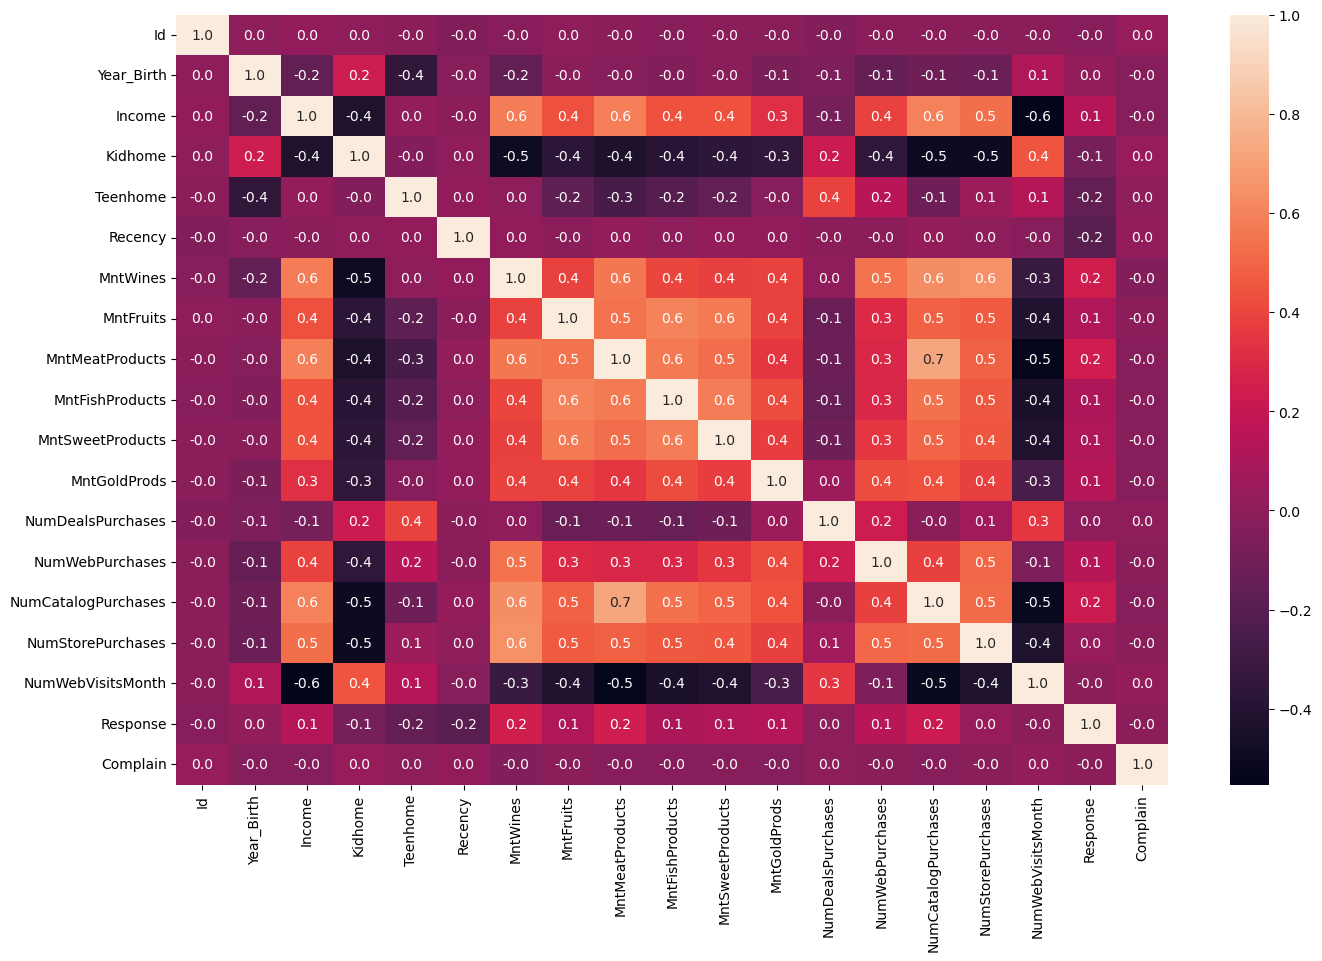

In [6]:
corr= df.corr(numeric_only=True)

# mapa de correlación de variables
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True,fmt=".1f")
plt.show()

In [7]:
# consulta de valores duplicados

df.duplicated().sum()

0

### Transformación de los datos

In [8]:
# formato columna de fechas

df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [9]:
# extracción de meses y años de alta clientes

df['Dt_MonthCreated']= df['Dt_Customer'].dt.month # extracción de mes alta cliente
df['Dt_YearCreated']= df['Dt_Customer'].dt.year # extracción de año de alta cliente

In [10]:
# creación de columna para saber la edad del cliente

df['Age']= 2024-df['Year_Birth']

In [11]:
df.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Dt_MonthCreated,Dt_YearCreated,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,6,2014,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,6,2014,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,5,2014,66
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,11,2014,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,8,2014,35
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,1,4,7,5,2,1,0,3,2014,66
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,1,10,10,7,6,1,0,1,2014,70
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,1,2,1,3,5,0,0,1,2014,57
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,3,6,2,9,4,0,0,11,2014,70
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,3,6,2,9,4,0,0,11,2014,70


In [12]:
# creación de grupos de edades

df['Age_Grup']= pd.qcut(df['Age'], q=3, labels=('Jovenes','Maduros','Mayores'))

In [13]:
# columna categorica response

df['Response_Cat'] = df['Response'].astype(int)

In [14]:
# consulta de como queda dataset

df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Dt_MonthCreated,Dt_YearCreated,Age,Age_Grup,Response_Cat
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,6,1,1,0,6,2014,54,Maduros,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,3,7,5,1,0,6,2014,63,Mayores,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,5,2,0,0,5,2014,66,Mayores,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,2,7,0,0,11,2014,57,Maduros,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,1,2,7,1,0,8,2014,35,Jovenes,1


### Análisis -EDA

In [15]:
# recuento de clientes que aceptaron campaña anterior

grupo_reponse= df['Response'].value_counts()

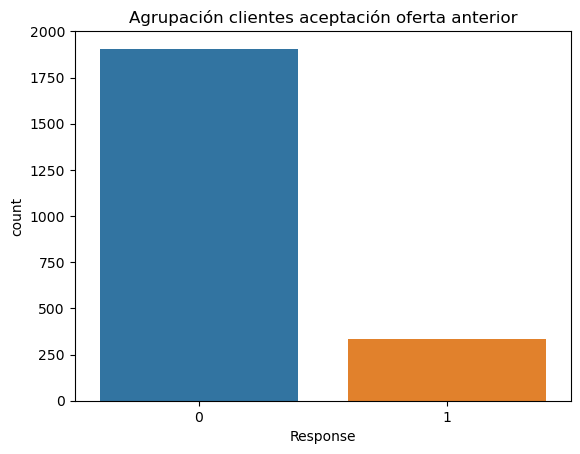

In [16]:
sns.countplot(data=df, x='Response')
plt.title('Agrupación clientes aceptación oferta anterior')
plt.show()

- En el gráfico anterior, observamos que solo 334 clientes, aceptaron la última campaña de promoción creada en el supermercado.

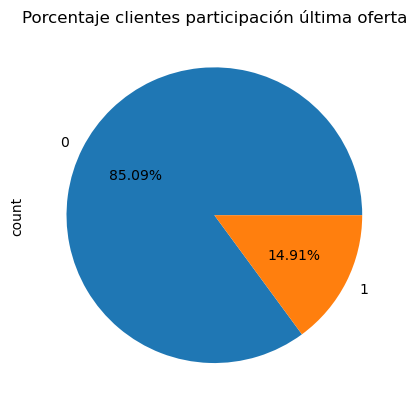

In [17]:
grupo_reponse.plot.pie(autopct='%.2f%%')
plt.title('Porcentaje clientes participación última oferta')
plt.show()

##### Análisis clientes que han realizado oferta

In [18]:
# filtrado de clientes con participación en la última oferta

clientes_descuento= df[(df['Response']==1)]

In [19]:
clientes_descuento

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Dt_MonthCreated,Dt_YearCreated,Age,Age_Grup,Response_Cat
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,6,1,1,0,6,2014,54,Maduros,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,3,7,5,1,0,6,2014,63,Mayores,1
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,1,2,7,1,0,8,2014,35,Jovenes,1
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,7,5,2,1,0,3,2014,66,Mayores,1
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,10,7,6,1,0,1,2014,70,Mayores,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,5153,1967,PhD,Married,77766.0,0,1,2013-02-22,97,1004,...,10,11,6,1,0,2,2013,57,Maduros,1
2196,4127,1967,PhD,Married,77766.0,0,1,2013-02-22,97,1004,...,10,11,6,1,0,2,2013,57,Maduros,1
2212,3979,1983,PhD,Divorced,90687.0,0,0,2013-05-22,98,982,...,2,8,2,1,0,5,2013,41,Jovenes,1
2216,7230,1960,PhD,Divorced,50611.0,0,1,2012-04-10,98,459,...,5,7,6,1,0,4,2012,64,Mayores,1


In [20]:
# observación del estado civil

discount_marital_group= clientes_descuento['Marital_Status'].value_counts()

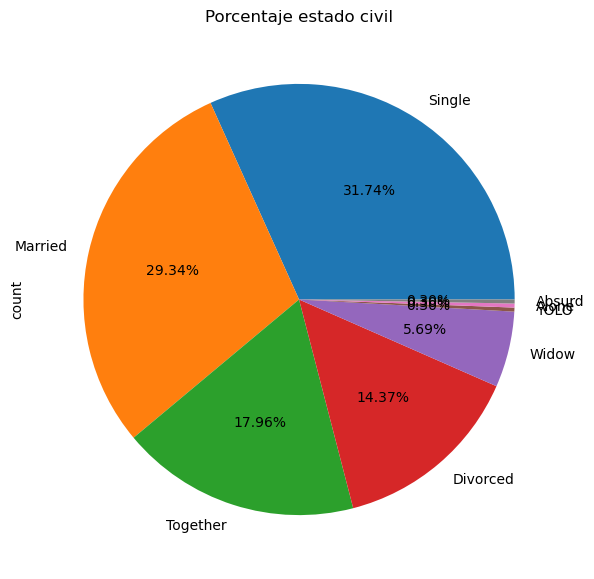

In [21]:

discount_marital_group.plot.pie(autopct='%.2f%%', figsize=(10,7))
plt.title('Porcentaje estado civil')
plt.show()

In [22]:
# recuenta en base al nivel de estudios

clientes_descuento['Education'].value_counts()

Education
Graduation    152
PhD           101
Master         57
2n Cycle       22
Basic           2
Name: count, dtype: int64

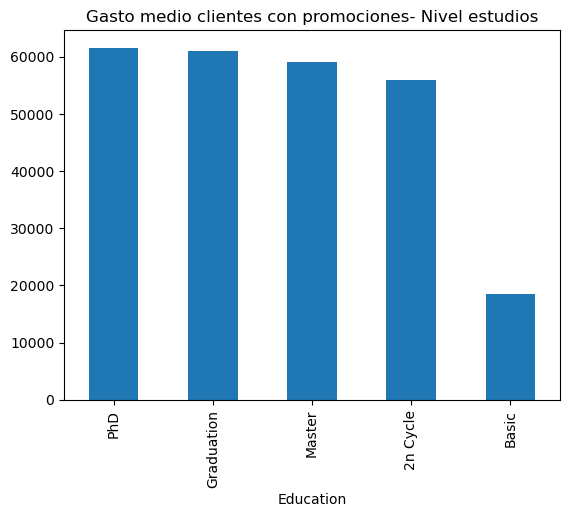

In [23]:
# agrupación del gasto medio según estudios

grupo_estudios_gastomedio= clientes_descuento.groupby('Education')['Income'].mean().sort_values(ascending=False)

# gráfica
grupo_estudios_gastomedio.plot(kind='bar')
plt.title('Gasto medio clientes con promociones- Nivel estudios')
plt.show()

- En este caso, se observa que no está mucha diferencia del gasto medio entre clientes que han disfrutado del último descuento si los calisificamos según sus estudios.

In [24]:
clientes_descuento.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Dt_MonthCreated,Dt_YearCreated,Age,Age_Grup,Response_Cat
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,6,1,1,0,6,2014,54,Maduros,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,3,7,5,1,0,6,2014,63,Mayores,1
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,1,2,7,1,0,8,2014,35,Jovenes,1
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,7,5,2,1,0,3,2014,66,Mayores,1
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,10,7,6,1,0,1,2014,70,Mayores,1


In [25]:
# consulta de las edades de clientes que han aceptado el descuento

gasto_medio_por_edad= clientes_descuento.groupby('Age')['Income'].mean()

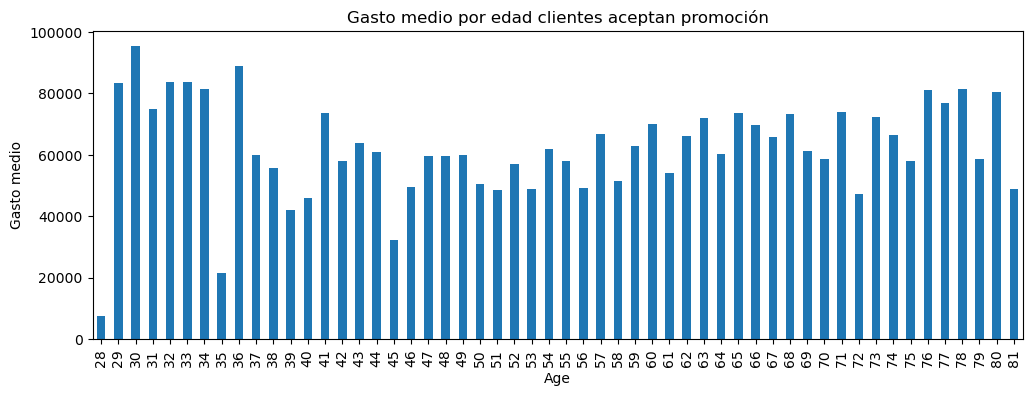

In [26]:
# grafica gasto medio por edad clientes con promociones

plt.figure(figsize=(12,4))
gasto_medio_por_edad.plot(kind='bar')
plt.title('Gasto medio por edad clientes aceptan promoción')
plt.ylabel('Gasto medio')
plt.show()

- En este caso, se observa que dentro del grupo de las personas que participaron en la antigua promoción los que menor gasto medio tienen son aquellos de 28 años. Pero al parecer, la edad no es un indicativo del gasto del cliente, pues los que tiene por ejemplo 29 o 30 sí que muestran un gasto medio más alto.
- Se puede intentar agrupar por grupos de edad, para ver si de ese modo de observa alguna correlación.

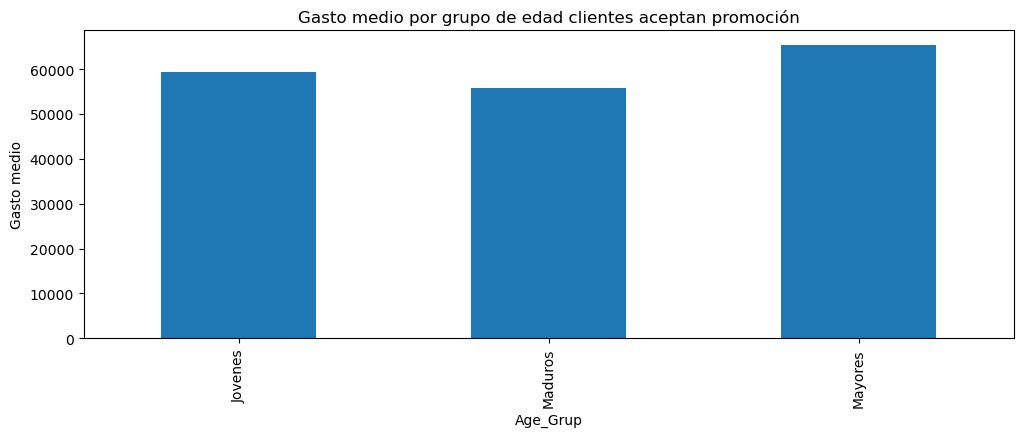

In [27]:
# agrupación de clientes por grupo de edad que han realizado descuentos

gasto_medio_grupoedad= clientes_descuento.groupby('Age_Grup')['Income'].mean()


# grafica gasto medio por grupo de edad clientes con promociones

plt.figure(figsize=(12,4))
gasto_medio_grupoedad.plot(kind='bar')
plt.title('Gasto medio por grupo de edad clientes aceptan promoción')
plt.ylabel('Gasto medio')
plt.show()

- En este caso, si que se observa que aquellos clientes que son del grupo de los mayores al parecer son los que mayor gasto medio han tenido en las compras del supermercado en los últimos 2 años.

##### Clasificación de grupos de edad:

- Jóvenes: 27-49
- Maduros: 49-60
- Mayores: + 60 años

In [28]:
respuesta_edad= df[['Response_Cat','Age_Grup']]

<Axes: xlabel='Age_Grup', ylabel='count'>

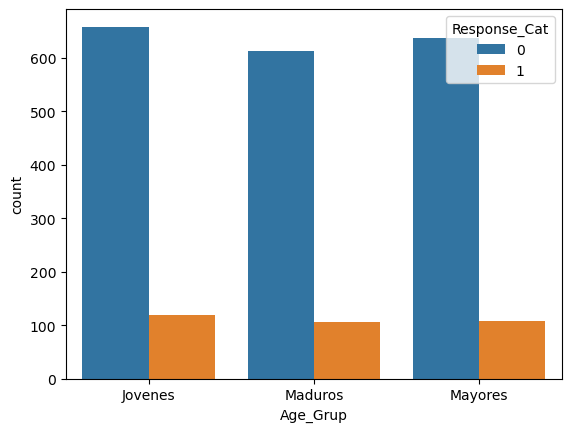

In [29]:
sns.countplot(data=respuesta_edad, x='Age_Grup', hue='Response_Cat')

- En la anterior gráfica, se obersva que aquellos clientes del grupo de jovenes, tienen un mayor registro de participación en la anterior oferta realizada.

In [30]:
# consulta de participación en descuento por grupos de edad

df.groupby(['Response','Age_Grup'])['Age_Grup'].count()

Response  Age_Grup
0         Jovenes     658
          Maduros     612
          Mayores     636
1         Jovenes     120
          Maduros     106
          Mayores     108
Name: Age_Grup, dtype: int64

In [31]:
respuesta_grupo_edad= df.groupby(['Response','Age_Grup'])['Age_Grup'].count()

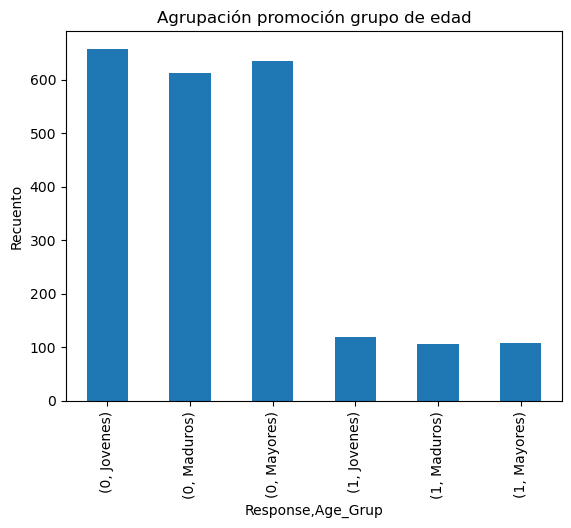

In [32]:
respuesta_grupo_edad.plot(kind='bar')
plt.ylabel('Recuento')
plt.title('Agrupación promoción grupo de edad')
plt.show()

- En la última oferta solo el 14,91% de los clientes participaron.
- Dentro de ese grupo el 31.74% son solteros y el 29,34% están casados. Los que menos porcentaje dentro de este grupo mostraron son divoricados(14,37%) y viudos(5,69%)

- También que en mayor registro, es con estudios de graduados seguidos de los que tienen un doctorado. Lo que menos registros tienen son los de 2n ciclo y los de estudios básicos. No obstante, los que mayor gasto medio presentaron son los que estudiaron un doctorado, graduados o con master.

- El grupo de edad con mayor gasto medio, fue el de mayores (+60 años), aunque no han sido los de mayor participación en la última oferta.

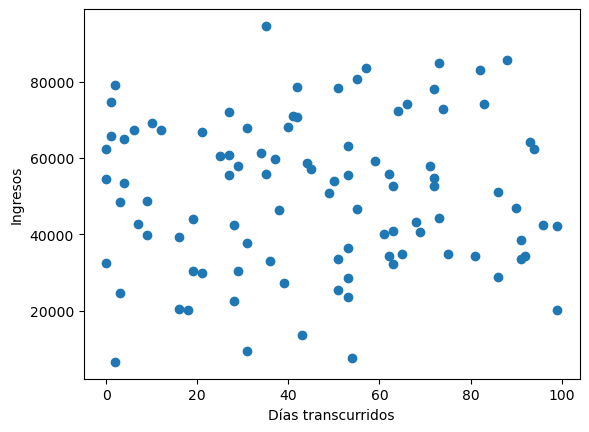

In [33]:
muestra = df.sample(100)

#variables
x= muestra['Recency']
y= muestra['Income']

#grafico
plt.scatter(x,y)
plt.xlabel('Días transcurridos')
plt.ylabel('Ingresos')
plt.show()

- Después de ver si estaba alguna relación no esperada, con las variables Income(ingresos cliente) y Recency (días trasncurridos desde la última compra), observo que está un registro para más de los 90 días, donde el gasto es superior. Voy a consultar si esto puede ser una variable que ayude al análisis.

In [34]:
# filtrado variable recency mayor que 100 días

recency_mayor90= df[(df['Recency']>=90)]

In [35]:
recency_mayor90

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Dt_MonthCreated,Dt_YearCreated,Age,Age_Grup,Response_Cat
2022,10854,1970,PhD,Married,38853.0,1,1,2014-05-23,90,29,...,0,3,7,0,0,5,2014,54,Maduros,0
2023,7419,1968,Master,Divorced,27071.0,1,0,2014-04-23,90,8,...,0,3,6,0,0,4,2014,56,Maduros,0
2024,5558,1954,PhD,Single,90933.0,0,0,2014-03-31,90,1020,...,6,4,1,0,0,3,2014,70,Mayores,0
2025,832,1966,PhD,Together,65814.0,0,1,2014-02-03,90,561,...,2,10,5,0,0,2,2014,58,Maduros,0
2026,4964,1958,PhD,Together,74250.0,0,0,2014-01-26,90,680,...,11,4,1,0,0,1,2014,66,Mayores,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,2,11,4,0,0,7,2013,48,Jovenes,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,3,8,0,0,1,2013,47,Jovenes,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,1,5,8,0,0,3,2012,48,Jovenes,0
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,4,10,3,0,0,11,2012,46,Jovenes,0


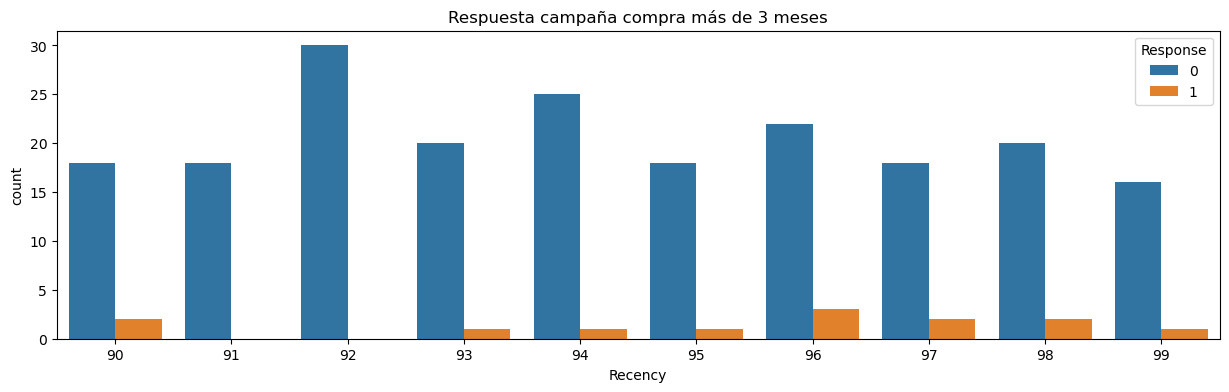

In [36]:
plt.figure(figsize=(15,4))
sns.countplot(data=recency_mayor90, x='Recency', hue='Response')
plt.title('Respuesta campaña compra más de 3 meses')
plt.show()


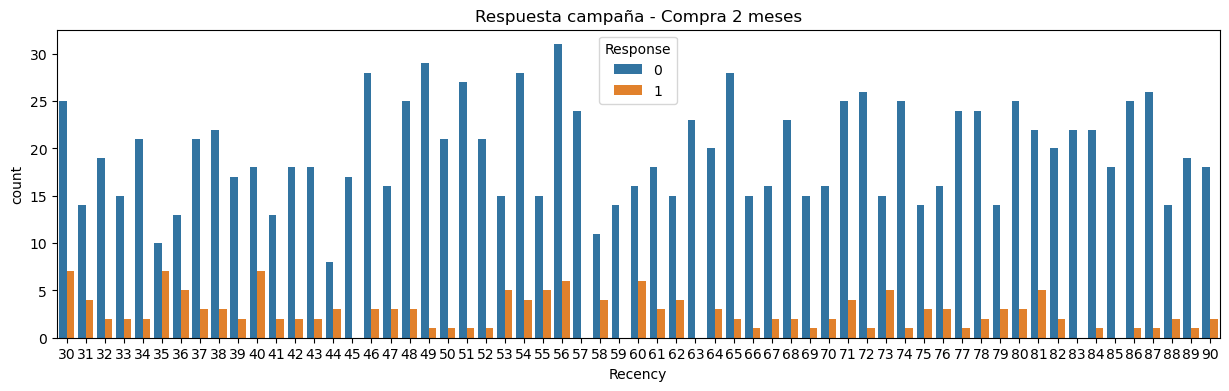

In [37]:
recency_2mes= df[(df['Recency']>=30)&(df['Recency']<=90)].sort_values(by='Recency')

# grafica
plt.figure(figsize=(15,4))
sns.countplot(data=recency_2mes, x='Recency', hue='Response')
plt.title('Respuesta campaña - Compra 2 meses')
plt.show()


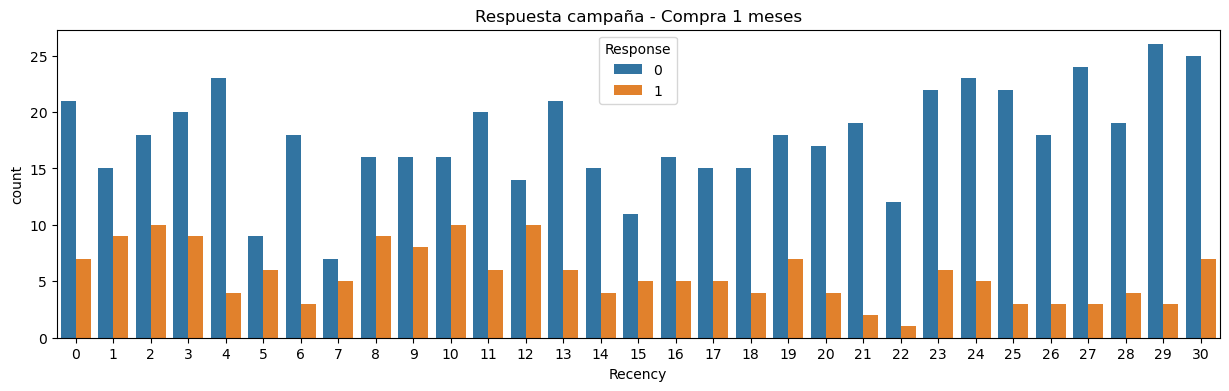

In [38]:
recency_1mes= df[(df['Recency']<=30)]

# grafica
plt.figure(figsize=(15,4))
sns.countplot(data=recency_1mes, x='Recency', hue='Response')
plt.title('Respuesta campaña - Compra 1 meses')
plt.show()

- En este caso, se puede resumir que están más registro de usuarios que han utilizado la promoción, en aquellos que cuentan con menos de 12 días, desde la última visita.

#### Análisis de compras online/store

In [39]:
# llamado de nombre columnas

df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Dt_MonthCreated', 'Dt_YearCreated', 'Age',
       'Age_Grup', 'Response_Cat'],
      dtype='object')

- **NumDealsPurchases**: número de compras realizadas con descuento
- **NumCatalogPurchases**: número de compras realizadas por catálogo (compra de productos que se envían por correo)
- **NumStorePurchases**: número de compras realizadas en tienda
- **NumWebPurchases**: número de compras realizadas en en la web

In [40]:
# agrupacion 

purchases_response= df.groupby(['Age','Response'])[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].mean().reset_index()

C:\Users\gemas\data\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


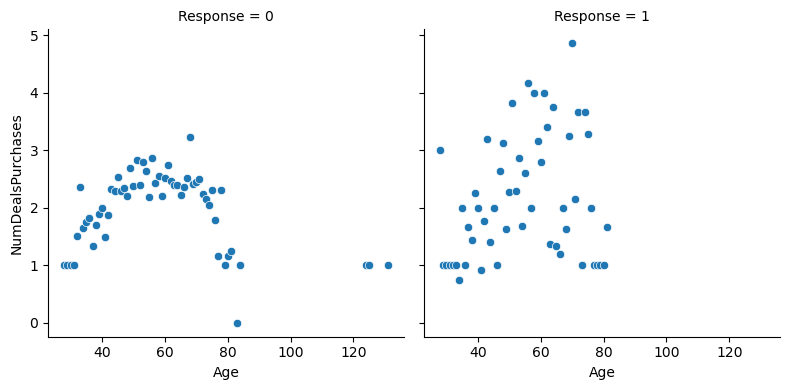

In [41]:
# grafica 1

sns.relplot(kind='scatter', data=purchases_response, x='Age', y='NumDealsPurchases',col='Response', col_wrap=2, height=4)
plt.show()

- En la gráfica anterior, se observa que aquellos clientes de entre 40 - 80 años, no superan 3 ocasines en utilizar un descuento.
- En cambio, los clientes que han realizado la última oferta no muestran mucha correlación entre estas variables.

C:\Users\gemas\data\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


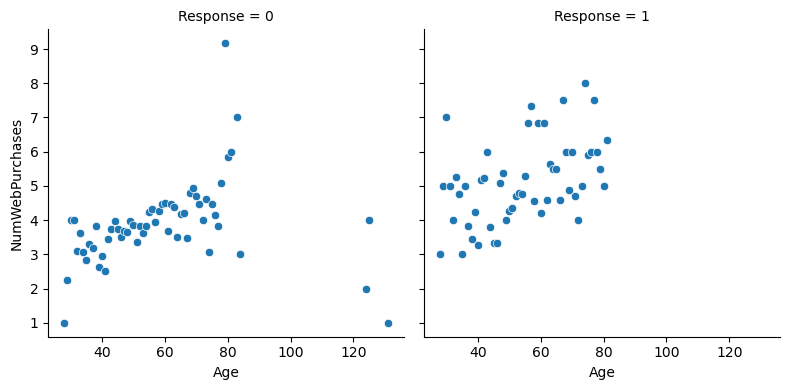

In [42]:
# grafica 2

sns.relplot(kind='scatter', data=purchases_response, x='Age', y='NumWebPurchases',col='Response', col_wrap=2, height=4)
plt.show()

- En la gáfica anterior, se observa que en el grupo de los participantes de la última oferta, los pedidos por la web de media son a partir de 3 con una tendencia ascendente a medida que aumenta la edad.
- Mientras que en el grupo que no participó en la última oferta, tiene una media de pedidos en la web no superior a 4, esto ocurre entre los que tienen entre 40 - 70 años. Mientras que dentro de este mismo grupo, los menores de 40 apenas y tienen de media 2 pedidos online.

C:\Users\gemas\data\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


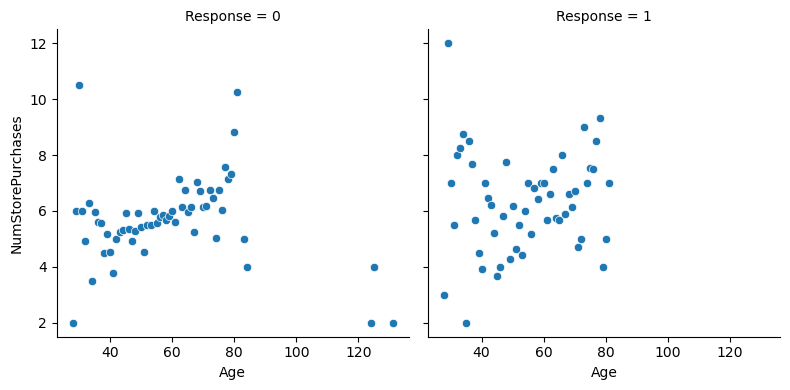

In [43]:
# grafica 3

sns.relplot(kind='scatter', data=purchases_response, x='Age', y='NumStorePurchases',col='Response', col_wrap=2, height=4)
plt.show()

- La variable de las compras en tienda, muestra en la gráfica anterior que aquellos clientes que no han participado en la última oferta a mayor edad tienen, mayor es el número de compras que realizan en tienda.

- En cambio, aquellos que han disfrutado de la oferta, también muestran una relación ascendente entre nº de compras y edad, pero esta es mucho más leve, casi se puede indicar que no influye la edad y la compra.

### Conclusión primer análisis

- Con estos resultados, se puede resumir que aquellos clientes que son jóvenes, solteros, podrían ser posibles clientes para la futura oferta.
- También es necesario detectar el grupo al que pertenecen aquellos usuarios que han disfrutado más de ocasiones de los descuentos, así como aquellos que también hacen más de 5 compras online.

### Maching learning

Trabjaré con las siguientes variables para el análisis
- Age_CategoricNum: Grupo de edad del cliente categorico 1- jovenes 2- maduros 3- mayores
- Response_Cat: Participación última promoción 1=Si 0=No
- NumDealsPurchases: número de compras realizadas con descuento
- NumStorePurchases: número de compras realizadas en tienda
- NumWebPurchases: número de compras realizadas en la web


In [44]:
#models y estimators
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [45]:
df['Age_CategoricNum']= pd.qcut(df['Age'], q=3).cat.codes

In [82]:
# variables

variables_modelo= df[['Age_CategoricNum','Response_Cat','NumDealsPurchases','NumStorePurchases','NumWebPurchases']].sample(200)

In [83]:
#definición x 

X= variables_modelo[['NumDealsPurchases','NumStorePurchases','Age_CategoricNum','NumWebPurchases']]

In [84]:
y= variables_modelo['Response_Cat']

In [91]:
# datos de muestra

X_train,x_test,y_train,y_test = train_test_split (X,y, test_size=0.3)

In [104]:
# algoritmo

algoritmo= DecisionTreeClassifier(max_depth=5, random_state=0)

In [105]:
# entrenamiento del modelo

modelo= algoritmo.fit(X_train,y_train)

In [106]:
# predicción response cat

prediccion= modelo.predict(x_test)

In [107]:
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [108]:
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        48
           1       0.50      0.08      0.14        12

    accuracy                           0.80        60
   macro avg       0.66      0.53      0.51        60
weighted avg       0.75      0.80      0.74        60



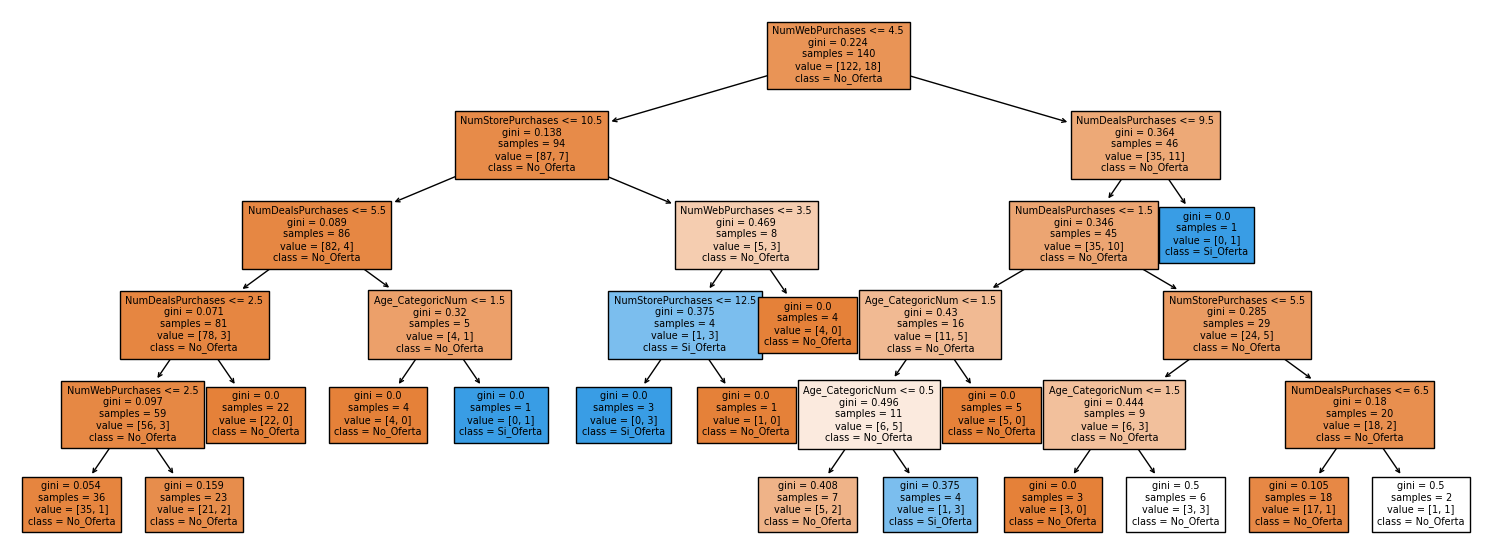

In [110]:
# arbol de clasificación

arbol = plt.figure(figsize=(19,7))
tree = plot_tree(modelo, feature_names= X.columns.tolist(), class_names=['No_Oferta', 'Si_Oferta'], filled=True, fontsize=7)

- En este caso, se observa que si el número de pedidos en la web, es superior a 5 y han realizado más de 9 descuentos, es un posible cliente que interese la oferta.
- Si realizan 4 pedidos online y más de 10 compras en tienda, también es mayor la probabilidad de que hagan una oferta.
- En cambio, están con menor probabilidades de obtar por una oferta, aquellos que han realizado menos de 2 compras online, que han utilizado las promociones menos de 2 ocasiones.

## Selección clientes campaña de marketing

In [347]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Dt_MonthCreated', 'Dt_YearCreated', 'Age',
       'Age_Grup', 'Response_Cat', 'Age_CategoricNum'],
      dtype='object')

In [119]:
# filtrado de clientes que cumplen las condiciones del análisis

clientes_marketing= df[(df['NumStorePurchases']>=9)&(df['NumWebPurchases']>=4)&(df['NumDealsPurchases']>=9)]

In [120]:
clientes_marketing['Response'].value_counts()

Response
0    7
1    3
Name: count, dtype: int64

In [121]:
clientes_marketing

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Dt_MonthCreated,Dt_YearCreated,Age,Age_Grup,Response_Cat,Age_CategoricNum
269,967,1976,Graduation,Married,46049.0,1,1,2013-07-21,11,342,...,9,7,1,0,7,2013,48,Jovenes,1,0
400,3478,1971,PhD,Married,60585.0,1,1,2013-06-24,17,267,...,9,5,1,0,6,2013,53,Maduros,1,1
471,2408,1976,Graduation,Married,58597.0,1,1,2012-11-20,20,490,...,9,7,0,0,11,2012,48,Jovenes,0,0
902,6566,1954,PhD,Married,72550.0,1,1,2012-08-11,39,826,...,12,8,0,0,8,2012,70,Mayores,0,2
1077,851,1972,Master,Married,57136.0,1,1,2013-09-07,48,306,...,10,6,0,0,9,2013,52,Maduros,0,1
1262,531,1954,PhD,Divorced,57333.0,0,1,2012-09-22,55,941,...,9,6,1,0,9,2012,70,Mayores,1,2
1686,3594,1973,Master,Married,54108.0,1,1,2012-05-11,74,539,...,9,8,0,0,5,2012,51,Maduros,0,1
1718,238,1967,2n Cycle,Together,67309.0,1,1,2013-01-23,76,515,...,9,7,0,0,1,2013,57,Maduros,0,1
1997,8148,1956,Master,Together,50898.0,1,1,2013-08-01,88,285,...,12,5,0,0,8,2013,68,Mayores,0,2
2218,4974,1970,Graduation,Single,83273.0,1,2,2012-09-25,98,433,...,9,7,0,0,9,2012,54,Maduros,0,1


### Conclusiones

- Podemos pasar este listado al equipo de marketing, para que informe sobre los clientes a los que es posible informar del descuento de Navidades y que tienen mayores probabilidades de realizarla.